In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv("agent reviews.csv")

In [15]:
df

,Id,loc_id,reviewdate,overallrating,review_id,reviewtext,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills
0,1,2,20-07-2019,5,5147645,I would like to take this opportunity to thank...,5.0,5.0,5.0,5.0
1,2,2,13-06-2019,5,5055732,A quick initial call back from Abbie switched ...,5.0,5.0,5.0,5.0
2,3,2,10-03-2019,5,4863849,Our experience with the McKenna Realty Team wa...,5.0,5.0,5.0,5.0
3,4,2,12-01-2019,5,4736198,The first thing I need to say is that Abbie de...,5.0,5.0,5.0,5.0
4,5,2,06-09-2018,5,4456756,I had Abbie help me buy my first house and it ...,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
999995,1000041,31835,09-09-2017,5,3609879,"When we met Kathleen, we gave her a long list ...",5.0,5.0,5.0,5.0
999996,1000042,31835,26-07-2017,5,3505881,Kathleen was great to work with! Very knowledg...,5.0,5.0,5.0,5.0
999997,1000043,51425,03-08-2016,5,2662998,James and The Cascade Team were amazing. So re...,5.0,5.0,5.0,5.0
999998,1000044,71545,15-11-2016,5,2923178,Excellent service! By far the best realtor I h...,5.0,5.0,5.0,5.0


In [16]:
row_value_counts = df.count(axis=0)
print(row_value_counts)

Id                    1000000
loc_id                1000000
reviewdate            1000000
overallrating         1000000
review_id             1000000
reviewtext            1000000
Local_knowledge        986187
Process_expertise      985793
Responsiveness         986319
Negotiation_skills     979597
dtype: int64


In [17]:
rows, cols = df.shape
print(f"Dimensions of dataset: {df.shape}")
print(f"Rows: {rows}\nColumns: {cols}")

Dimensions of dataset: (1000000, 10)
Rows: 1000000
Columns: 10


In [18]:
unique = pd.DataFrame(df.nunique()).transpose()
unique

,Id,loc_id,reviewdate,overallrating,review_id,reviewtext,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills
0,1000000,32313,3413,5,936933,935381,5,5,5,5


In [19]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Id                        0
loc_id                    0
reviewdate                0
overallrating             0
review_id                 0
reviewtext                0
Local_knowledge       13813
Process_expertise     14207
Responsiveness        13681
Negotiation_skills    20403
dtype: int64


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [12]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

About TextBlob
--------------

TextBlob is a free, open-source library in Python for processing textual data. It is a powerful package that reduces the complexity of the contextual data and derives in-depth information from the text. Like spaCy, its features and capabilities give insights into a text's grammatical structure that can be particularly helpful in the following fields.

TextBlob is particularly useful for the following tasks:

-   Phrase extraction: TextBlob helps explore text's grammatical structure through linguistic annotations and extraction feature
-   Part-of-speech tagging: TextBlob analyzes the grammatical role each word plays in a sentence
-   Sentiment analysis: TextBlob feature allows us to determine whether the input textual data has a positive, negative, or neutral tone
-   Tokenization: TextBlob can break the input text into linguistically meaningful or basic units for future analyses.
-   Word and phrase frequencies: TextBlob can give insights into word patterns in the text
-   Lemmatization: TextBlob can reduce inflected forms of a word into root words called a lemma
-   Spelling correction: TextBlob can help correct spelling in the input text document

### Explanation:

-   **Sentiment Analysis**: `TextBlob` is used to determine the sentiment polarity of the `reviewtext`. This method accounts for the emotional tone expressed by customers.
-   **Mapping Sentiment to Ratings**:
    -   **Polarity > 0.6**: Highly positive sentiment → Rating of 5.0
    -   **Polarity > 0.3**: Moderately positive sentiment → Rating of 4.0
    -   **Polarity > 0.0**: Slightly positive sentiment → Rating of 3.0
    -   **Polarity > -0.3**: Slightly negative sentiment → Rating of 2.0
    -   **Else**: Highly negative sentiment → Rating of 1.0

In [22]:
df.head()

,Id,loc_id,reviewdate,overallrating,review_id,reviewtext,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills
0,1,2,20-07-2019,5,5147645,I would like to take this opportunity to thank...,5.0,5.0,5.0,5.0
1,2,2,13-06-2019,5,5055732,A quick initial call back from Abbie switched ...,5.0,5.0,5.0,5.0
2,3,2,10-03-2019,5,4863849,Our experience with the McKenna Realty Team wa...,5.0,5.0,5.0,5.0
3,4,2,12-01-2019,5,4736198,The first thing I need to say is that Abbie de...,5.0,5.0,5.0,5.0
4,5,2,06-09-2018,5,4456756,I had Abbie help me buy my first house and it ...,5.0,5.0,5.0,5.0


In [23]:
def sentiment_to_rating(review):
    if pd.isna(review):
        return None
    sentiment = TextBlob(review).sentiment.polarity
    #### Mapping the sentiment polarity to a scale of 1 to 5
    if sentiment > 0.6:
        return 5.0
    elif sentiment > 0.3:
        return 4.0
    elif sentiment > 0.0:
        return 3.0
    elif sentiment > -0.3:
        return 2.0
    else:
        return 1.0

In [24]:
for column in ['Local_knowledge', 'Process_expertise', 'Responsiveness', 'Negotiation_skills']:
    df[column] = df.apply(lambda row: sentiment_to_rating(row['reviewtext']) if pd.isna(row[column]) else row[column], axis=1)

In [25]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Id                    0
loc_id                0
reviewdate            0
overallrating         0
review_id             0
reviewtext            0
Local_knowledge       0
Process_expertise     0
Responsiveness        0
Negotiation_skills    0
dtype: int64


In [26]:
unique = pd.DataFrame(df.nunique()).transpose()
unique

,Id,loc_id,reviewdate,overallrating,review_id,reviewtext,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills
0,1000000,32313,3413,5,936933,935381,5,5,5,5


In [27]:
def compute_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [29]:
df['sentiment_score'] = df['reviewtext'].apply(compute_sentiment)

In [30]:
df.head()

,Id,loc_id,reviewdate,overallrating,review_id,reviewtext,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills,sentiment_score
0,1,2,20-07-2019,5,5147645,I would like to take this opportunity to thank...,5.0,5.0,5.0,5.0,0.417424
1,2,2,13-06-2019,5,5055732,A quick initial call back from Abbie switched ...,5.0,5.0,5.0,5.0,0.235159
2,3,2,10-03-2019,5,4863849,Our experience with the McKenna Realty Team wa...,5.0,5.0,5.0,5.0,0.512000
3,4,2,12-01-2019,5,4736198,The first thing I need to say is that Abbie de...,5.0,5.0,5.0,5.0,0.295346
4,5,2,06-09-2018,5,4456756,I had Abbie help me buy my first house and it ...,5.0,5.0,5.0,5.0,0.297667


In [31]:
df.to_csv("Agentreview_cleaned.csv", index=False)

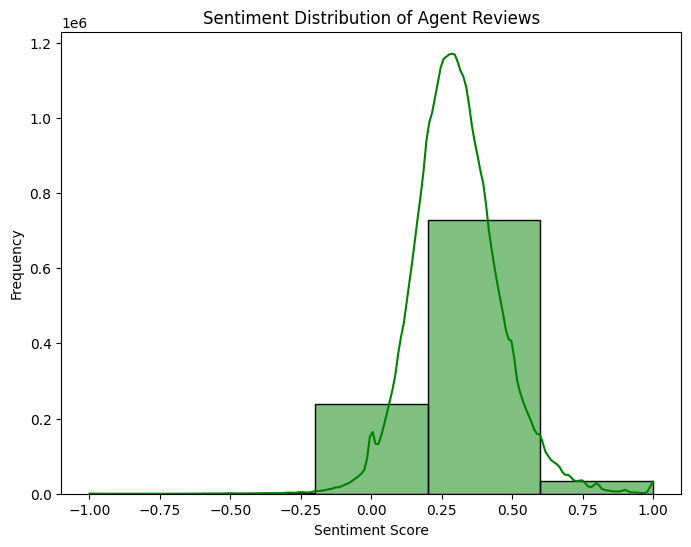

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=5, kde=True, color='green')
plt.title('Sentiment Distribution of Agent Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

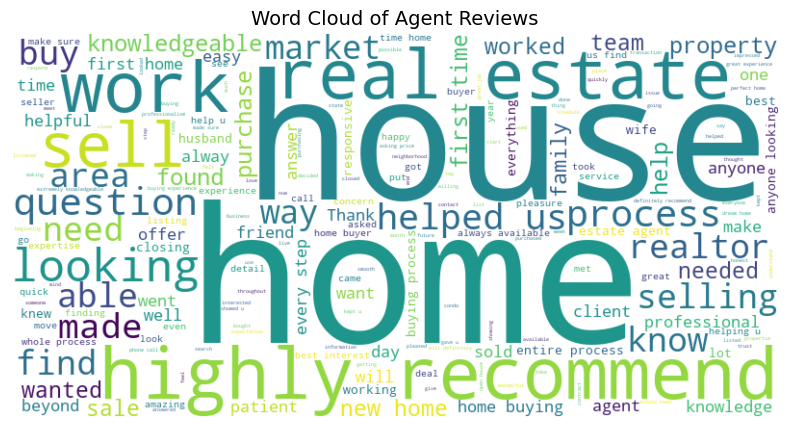

In [37]:
### Function to join all review text into a single string
text = " ".join(review for review in df['reviewtext'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Agent Reviews', fontsize=14)
plt.show()

In [2]:
df =  pd.read_csv('Agentreview_cleaned.csv')

In [3]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

In [4]:
model_name = "sohan-ai/sentiment-analysis-model-amazon-reviews"
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(model_name)

C:\Users\jayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jayan\.cache\huggingface\hub\models--sohan-ai--sentiment-analysis-model-amazon-reviews. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [5]:
### Function to split input tokens into chunks
def get_input_ids_and_attention_mask_chunk(tokens):
    chunksize = 512
    input_id_chunks = list(tokens['input_ids'][0].split(chunksize - 2))
    attention_mask_chunks = list(tokens['attention_mask'][0].split(chunksize - 2))
    
    for i in range(len(input_id_chunks)):
        input_id_chunks[i] = torch.cat([
            torch.tensor([tokenizer.cls_token_id]), input_id_chunks[i], torch.tensor([tokenizer.sep_token_id])
        ])
        
        attention_mask_chunks[i] = torch.cat([
            torch.tensor([1]), attention_mask_chunks[i], torch.tensor([1])
        ])
        
        pad_length = chunksize - input_id_chunks[i].shape[0]
        
        if pad_length > 0:
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([tokenizer.pad_token_id] * pad_length)
            ])
            attention_mask_chunks[i] = torch.cat([
                attention_mask_chunks[i], torch.Tensor([0] * pad_length)
            ])
            
    return input_id_chunks, attention_mask_chunks 

In [6]:
### Function to classify sentiment for a given text
def classify_sentiment(text):
    tokens = tokenizer.encode_plus(text, add_special_tokens=False, return_tensors='pt')
    input_id_chunks, attention_mask_chunks = get_input_ids_and_attention_mask_chunk(tokens)
    sentiment_scores_list = []
    
    for input_ids, attention_mask in zip(input_id_chunks, attention_mask_chunks):
        input_dict = {
            'input_ids': input_ids.unsqueeze(0).to(torch.long),
            'attention_mask': attention_mask.unsqueeze(0).to(torch.int)
        }
        
        try:
            with torch.no_grad():
                outputs = model(**input_dict)
            probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
            mean_probabilities = probabilities.mean(dim=0)
            sentiment_scores_list.append(mean_probabilities.tolist())
        except Exception as e:
            print(f"Error processing input: {e}")
    
    return sentiment_scores_list

In [7]:
### Assuming df is your DataFrame with a 'textcolumn' containing the reviews
df['sentiment_scores'] = df['reviewtext'].apply(classify_sentiment)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors


In [8]:
### Function to extract scores for positive and negative sentiment classes
def extract_sentiment_scores(scores):
    positive_score = scores[0][1]  ### Index 1 corresponds to positive sentiment
    negative_score = scores[0][0]  ### Index 0 corresponds to negative sentiment
    return pd.Series({'RoBERTa_Positive': positive_score, 'RoBERTa_Negative': negative_score})

df[['RoBERTa_Positive', 'RoBERTa_Negative']] = df['sentiment_scores'].apply(extract_sentiment_scores)

df.drop(columns=['sentiment_scores'], inplace=True)

In [11]:
df.to_csv("Agentreview_BERT.csv", index = False )

In [2]:
df = pd.read_csv("Agentreview_BERT.csv")

In [3]:
df = df.drop(columns=["reviewtext", "reviewdate"])

In [4]:
df.head()

,Id,loc_id,overallrating,review_id,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills,sentiment_score,RoBERTa_Positive,RoBERTa_Negative
0,1,2,5,5147645,5.0,5.0,5.0,5.0,0.417424,0.989265,0.010735
1,2,2,5,5055732,5.0,5.0,5.0,5.0,0.235159,0.997054,0.002946
2,3,2,5,4863849,5.0,5.0,5.0,5.0,0.512000,0.984541,0.015459
3,4,2,5,4736198,5.0,5.0,5.0,5.0,0.295346,0.986019,0.013981
4,5,2,5,4456756,5.0,5.0,5.0,5.0,0.297667,0.995020,0.004980


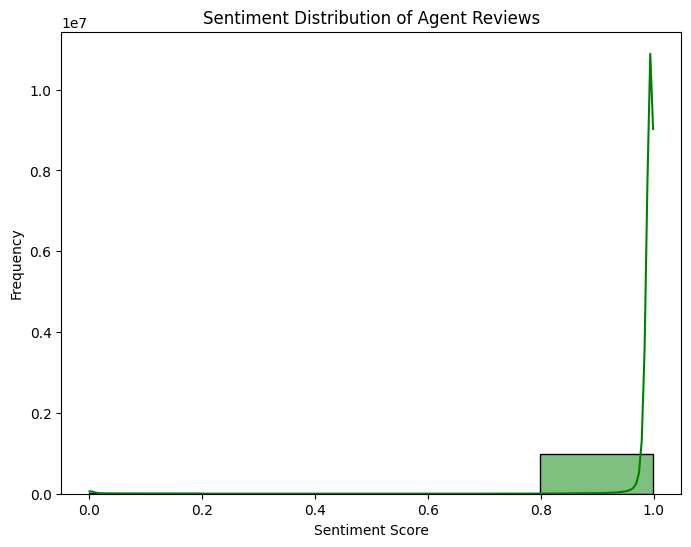

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['RoBERTa_Positive'], bins=5, kde=True, color='green')
plt.title('Positve Sentiment Distribution of Agent Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

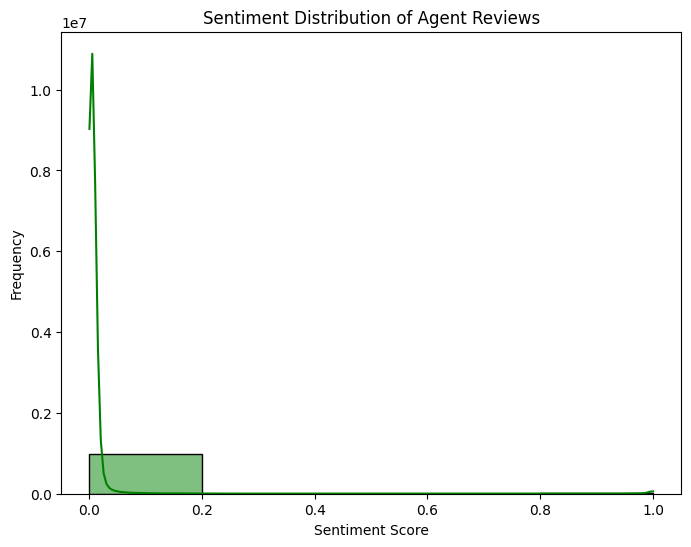

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['RoBERTa_Negative'], bins=5, kde=True, color='green')
plt.title('Negative Sentiment Distribution of Agent Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
df.rename(columns={"sentiment_score": "TextBlob_Scores"})

,Id,loc_id,overallrating,review_id,Local_knowledge,Process_expertise,Responsiveness,Negotiation_skills,TextBlob_Scores,RoBERTa_Positive,RoBERTa_Negative
0,1,2,5,5147645,5.0,5.0,5.0,5.0,0.417424,0.989265,0.010735
1,2,2,5,5055732,5.0,5.0,5.0,5.0,0.235159,0.997054,0.002946
2,3,2,5,4863849,5.0,5.0,5.0,5.0,0.512000,0.984541,0.015459
3,4,2,5,4736198,5.0,5.0,5.0,5.0,0.295346,0.986019,0.013981
4,5,2,5,4456756,5.0,5.0,5.0,5.0,0.297667,0.995020,0.004980
...,...,...,...,...,...,...,...,...,...,...,...
999995,1000041,31835,5,3609879,5.0,5.0,5.0,5.0,0.350455,0.986263,0.013737
999996,1000042,31835,5,3505881,5.0,5.0,5.0,5.0,0.258333,0.994337,0.005663
999997,1000043,51425,5,2662998,5.0,5.0,5.0,5.0,0.274487,0.995788,0.004212
999998,1000044,71545,5,2923178,5.0,5.0,5.0,5.0,0.580000,0.995422,0.004578


In [8]:
df.to_excel("Agentreview_BERTxTextBlob.xlsx")